In [1]:
import re
import string

In [2]:
import numpy as np

In [3]:
import requests                 # html requests
from bs4 import BeautifulSoup   # html parsing
#import sys                      # arguments and exit
#import os                       # file system
import pandas as pd             # read in Excel
from time import sleep          # for breaks in between reading each URLs
from datetime import datetime
from multiprocessing import Pool


In [4]:
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()

C:\Users\cheny\Downloads\ANACONDA\lib\site-packages\nose\plugins\manager.py:418: UserWarning: Module PIL was already imported from C:\Users\cheny\Downloads\ANACONDA\lib\site-packages\PIL\__init__.py, but c:\users\cheny\desktop\learning\projects\web scraping is being added to sys.path
  import pkg_resources


In [5]:
from sklearn.feature_extraction.text import CountVectorizer

In [6]:
from gensim.models.wrappers import LdaMallet

C:\Users\cheny\Downloads\ANACONDA\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [7]:
### ceating doc-word matrix ###
# Importing Gensim
import gensim
from gensim import corpora, models

In [8]:
import os

In [9]:
from wordcloud import WordCloud


In [10]:
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

In [11]:
import nltk
#nltk.download()

from textblob import TextBlob
from textblob import sentiments

In [12]:
import matplotlib.pyplot as plt

In [13]:
from wordcloud import ImageColorGenerator

In [14]:
from PIL import Image
import PIL.ImageOps

In [15]:
import plotly.express as px

In [16]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [17]:
from gensim.models import CoherenceModel

In [18]:
from gensim.models.phrases import Phrases, Phraser


In [19]:
import pyLDAvis.gensim
import pickle 
import pyLDAvis
# Visualize the topics

In [20]:
import plotly.figure_factory as ff


In [21]:
from plotly.offline import init_notebook_mode, iplot

init_notebook_mode(connected=True)  


In [22]:
from nltk.stem import PorterStemmer 


In [23]:
from textblob import TextBlob

#  Review Scraping

In [20]:
# open URL
user_agent = 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/75.0.3770.142 Safari/537.36'
headers = {'User-Agent': user_agent}

In [23]:
#Assign the total pages to be scraped
page_number = 51

In [35]:
#scrpe date, comment, user score from Metacritic
def scrape(page_number,headers,platform):
    try:
        df = pd.DataFrame()
        for i in range(0,page_number):
            #url = 'https://www.metacritic.com/game/switch/animal-crossing-new-horizons/user-reviews?page='+str(i)
            url = 'https://www.metacritic.com/game/{}/cyberpunk-2077/user-reviews?page='.format(platform)+str(i)
            print(url)
            res = requests.get(url, None, headers=headers, stream=True)
            soup = BeautifulSoup(res.content, 'html.parser')
            for s1 in soup.findAll('div', attrs = {'class':'review_content'}):
                if s1.find('span', class_='blurb blurb_expanded'): 
                    comment = s1.find('span', class_='blurb blurb_expanded').text
                elif s1.find('div',class_='review_body').find('span') !=None:
                    comment = s1.find('div',class_='review_body').find('span').text 
                else:
                    comment = None
                df = df.append(pd.DataFrame([[s1.find('div', class_='date').text,
                                              platform,
                                              s1.find('div', class_='review_grade').find_all('div')[0].text,
                                              comment
                                             ]]  , 
                                            columns=['Date','Platform','Score','Review'])
                                                , ignore_index=True)
                    
            sleep(np.random.uniform(0.2,2))
        return df

    except (requests.exceptions.ChunkedEncodingError, requests.ConnectionError) as e:
        print("There is an error: %s" % e)
    

In [40]:
reviewps = scrape(51,headers,'playstation-4')

https://www.metacritic.com/game/playstation-4/cyberpunk-2077/user-reviews?page=0
https://www.metacritic.com/game/playstation-4/cyberpunk-2077/user-reviews?page=1
https://www.metacritic.com/game/playstation-4/cyberpunk-2077/user-reviews?page=2
https://www.metacritic.com/game/playstation-4/cyberpunk-2077/user-reviews?page=3
https://www.metacritic.com/game/playstation-4/cyberpunk-2077/user-reviews?page=4
https://www.metacritic.com/game/playstation-4/cyberpunk-2077/user-reviews?page=5
https://www.metacritic.com/game/playstation-4/cyberpunk-2077/user-reviews?page=6
https://www.metacritic.com/game/playstation-4/cyberpunk-2077/user-reviews?page=7
https://www.metacritic.com/game/playstation-4/cyberpunk-2077/user-reviews?page=8
https://www.metacritic.com/game/playstation-4/cyberpunk-2077/user-reviews?page=9
https://www.metacritic.com/game/playstation-4/cyberpunk-2077/user-reviews?page=10
https://www.metacritic.com/game/playstation-4/cyberpunk-2077/user-reviews?page=11
https://www.metacritic.com

In [43]:
len(reviewps)

3825

In [39]:
reviewpc = scrape(129,headers,'pc')

https://www.metacritic.com/game/pc/cyberpunk-2077/user-reviews?page=0
https://www.metacritic.com/game/pc/cyberpunk-2077/user-reviews?page=1
https://www.metacritic.com/game/pc/cyberpunk-2077/user-reviews?page=2
https://www.metacritic.com/game/pc/cyberpunk-2077/user-reviews?page=3
https://www.metacritic.com/game/pc/cyberpunk-2077/user-reviews?page=4
https://www.metacritic.com/game/pc/cyberpunk-2077/user-reviews?page=5
https://www.metacritic.com/game/pc/cyberpunk-2077/user-reviews?page=6
https://www.metacritic.com/game/pc/cyberpunk-2077/user-reviews?page=7
https://www.metacritic.com/game/pc/cyberpunk-2077/user-reviews?page=8
https://www.metacritic.com/game/pc/cyberpunk-2077/user-reviews?page=9
https://www.metacritic.com/game/pc/cyberpunk-2077/user-reviews?page=10
https://www.metacritic.com/game/pc/cyberpunk-2077/user-reviews?page=11
https://www.metacritic.com/game/pc/cyberpunk-2077/user-reviews?page=12
https://www.metacritic.com/game/pc/cyberpunk-2077/user-reviews?page=13
https://www.meta

https://www.metacritic.com/game/pc/cyberpunk-2077/user-reviews?page=116
https://www.metacritic.com/game/pc/cyberpunk-2077/user-reviews?page=117
https://www.metacritic.com/game/pc/cyberpunk-2077/user-reviews?page=118
https://www.metacritic.com/game/pc/cyberpunk-2077/user-reviews?page=119
https://www.metacritic.com/game/pc/cyberpunk-2077/user-reviews?page=120
https://www.metacritic.com/game/pc/cyberpunk-2077/user-reviews?page=121
https://www.metacritic.com/game/pc/cyberpunk-2077/user-reviews?page=122
https://www.metacritic.com/game/pc/cyberpunk-2077/user-reviews?page=123
https://www.metacritic.com/game/pc/cyberpunk-2077/user-reviews?page=124
https://www.metacritic.com/game/pc/cyberpunk-2077/user-reviews?page=125
https://www.metacritic.com/game/pc/cyberpunk-2077/user-reviews?page=126
https://www.metacritic.com/game/pc/cyberpunk-2077/user-reviews?page=127
https://www.metacritic.com/game/pc/cyberpunk-2077/user-reviews?page=128


In [44]:
len(reviewpc)

13209

In [38]:
reviewxb = scrape(17,headers,'xbox-one')

https://www.metacritic.com/game/xbox-one/cyberpunk-2077/user-reviews?page=0
https://www.metacritic.com/game/xbox-one/cyberpunk-2077/user-reviews?page=1
https://www.metacritic.com/game/xbox-one/cyberpunk-2077/user-reviews?page=2
https://www.metacritic.com/game/xbox-one/cyberpunk-2077/user-reviews?page=3
https://www.metacritic.com/game/xbox-one/cyberpunk-2077/user-reviews?page=4
https://www.metacritic.com/game/xbox-one/cyberpunk-2077/user-reviews?page=5
https://www.metacritic.com/game/xbox-one/cyberpunk-2077/user-reviews?page=6
https://www.metacritic.com/game/xbox-one/cyberpunk-2077/user-reviews?page=7
https://www.metacritic.com/game/xbox-one/cyberpunk-2077/user-reviews?page=8
https://www.metacritic.com/game/xbox-one/cyberpunk-2077/user-reviews?page=9
https://www.metacritic.com/game/xbox-one/cyberpunk-2077/user-reviews?page=10
https://www.metacritic.com/game/xbox-one/cyberpunk-2077/user-reviews?page=11
https://www.metacritic.com/game/xbox-one/cyberpunk-2077/user-reviews?page=12
https://w

In [45]:
len(reviewxb)

1658

In [36]:
reviewstadia = scrape(1,headers,'stadia')

https://www.metacritic.com/game/stadia/cyberpunk-2077/user-reviews?page=0


In [46]:
len(reviewstadia)

50

In [41]:
review = reviewpc.append(reviewps).append(reviewxb).append(reviewstadia)

In [42]:
len(review)

18742

In [47]:
review.head()

Date Platform Score  \
0  Jan 21, 2021       pc     4   
1  Feb  4, 2021       pc     1   
2  Jan 23, 2021       pc     2   
3  Dec 12, 2020       pc     1   
4  Dec 12, 2020       pc     1   

                                              Review  
0  Feel betrayed, and not because I was on the hy...  
1  This release is an AUDACITY! What we got here ...  
2  Graphics - 9/10 (with ray tracing) / 7.7/10 (w...  
3  I'm not the kind of person who writes review b...  
4  The worst deception I had in videogames. Even ...

In [48]:
review['Date']=pd.Series(pd.to_datetime(review['Date'] ,errors ='coerce'))
review['Score'] = review.Score.apply(lambda x:int(x))

In [50]:
review.to_csv('Cyber Punk review scrape.csv')

In [24]:
# review = pd.read_csv('Cyber Punk review scrape.csv')
# review = review.drop(columns = ['Unnamed: 0'])

In [25]:
review.head()

Date Platform  Score  \
0  2021-01-21       pc      4   
1  2021-02-04       pc      1   
2  2021-01-23       pc      2   
3  2020-12-12       pc      1   
4  2020-12-12       pc      1   

                                              Review  
0  Feel betrayed, and not because I was on the hy...  
1  This release is an AUDACITY! What we got here ...  
2  Graphics - 9/10 (with ray tracing) / 7.7/10 (w...  
3  I'm not the kind of person who writes review b...  
4  The worst deception I had in videogames. Even ...

# Review Cleaning

## Clean Review 

In [27]:
#add common words in game review to stop words
stop = stopwords.words('english')
newStopWords = ['CYBERPUNK 2077','Cyberpunk','2077','CYBERPUNK','CD Projekt','CD','Projekt','play','Play','played','get','Get','Buy','buy','game','Game','CDPR','que','de']

stop.extend(newStopWords)
exclude = set(string.punctuation) 
lemma = WordNetLemmatizer()
def clean(doc):
    if (doc != None):
#     if (doc != None) & (str(type(doc)) == "<class 'str'>"):
        #eliminate stop words from review
            stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
        #remove punctuation words
            punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
#             st=PorterStemmer() 
#             pst = " ".join([st.stem(word) for word in punc_free.split()])
        #lemmatize words
            normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    else:
        normalized = None
    return normalized

In [29]:
review['Cleaned Review'] = review['Review'].apply(lambda x:clean(x))

In [30]:
review = review.dropna()

In [31]:
#delete unneeded frequent words
freq=pd.Series(' '.join(review['Cleaned Review'].dropna()).split()).value_counts()[:20]
freq=['game', 'love', 'one', 'even', 'really', 'и', 'it','не','would','в','im','playing','на'] + newStopWords
review['Cleaned Review']=review['Cleaned Review'].apply(lambda sen:' '.join(x for x in sen.split()
if x not in freq))

In [32]:
len(review)

18185

In [33]:
review.head()

Date Platform  Score  \
0  2021-01-21       pc      4   
1  2021-02-04       pc      1   
2  2021-01-23       pc      2   
3  2020-12-12       pc      1   
4  2020-12-12       pc      1   

                                              Review  \
0  Feel betrayed, and not because I was on the hy...   
1  This release is an AUDACITY! What we got here ...   
2  Graphics - 9/10 (with ray tracing) / 7.7/10 (w...   
3  I'm not the kind of person who writes review b...   
4  The worst deception I had in videogames. Even ...   

                                      Cleaned Review  
0  feel betrayed hypetrain expectation unrealisti...  
1  release audacity got tech demo real 60 unfinis...  
2  graphic 910 with ray tracing 7710 without ray ...  
3  kind person writes review need write unfished ...  
4  worst deception videogames last u better this ...


## Assign Sentiments

In [34]:
#Assign Sentiments based on user score and Metacritic rules
def Metacritic_Sentiment(x):
    if x > 7:
        return 'Positive'
    if x < 5:
        return 'Negative'
    else: return 'Mixed'
review['Metacritic_Sentiment'] = review['Score'].apply(lambda x:int(x)).apply(lambda x:Metacritic_Sentiment(x))

In [35]:
#Assign sentiments based on user comments
review['Polarity'] = review['Cleaned Review'].map(lambda x: TextBlob(x).sentiment.polarity)

In [36]:
review['Subjectivity'] = review['Cleaned Review'].map(lambda x: TextBlob(x).sentiment.subjectivity)

In [37]:
review.head()

Date Platform  Score  \
0  2021-01-21       pc      4   
1  2021-02-04       pc      1   
2  2021-01-23       pc      2   
3  2020-12-12       pc      1   
4  2020-12-12       pc      1   

                                              Review  \
0  Feel betrayed, and not because I was on the hy...   
1  This release is an AUDACITY! What we got here ...   
2  Graphics - 9/10 (with ray tracing) / 7.7/10 (w...   
3  I'm not the kind of person who writes review b...   
4  The worst deception I had in videogames. Even ...   

                                      Cleaned Review Metacritic_Sentiment  \
0  feel betrayed hypetrain expectation unrealisti...             Negative   
1  release audacity got tech demo real 60 unfinis...             Negative   
2  graphic 910 with ray tracing 7710 without ray ...             Negative   
3  kind person writes review need write unfished ...             Negative   
4  worst deception videogames last u better this ...             Negative   

   Polarity  Subjectivity  
0  0.086769      0.556299  
1 -0.012726      0.443288  
2  0.270000      0.420000  
3  0.156548      0.509651  
4 -0.100000      0.713333

In [38]:
review_neg = review[review['Polarity']<0]

In [39]:
review_pos = review[review['Polarity']>0]

# Review EDA 

In [40]:
review.head()

Date Platform  Score  \
0  2021-01-21       pc      4   
1  2021-02-04       pc      1   
2  2021-01-23       pc      2   
3  2020-12-12       pc      1   
4  2020-12-12       pc      1   

                                              Review  \
0  Feel betrayed, and not because I was on the hy...   
1  This release is an AUDACITY! What we got here ...   
2  Graphics - 9/10 (with ray tracing) / 7.7/10 (w...   
3  I'm not the kind of person who writes review b...   
4  The worst deception I had in videogames. Even ...   

                                      Cleaned Review Metacritic_Sentiment  \
0  feel betrayed hypetrain expectation unrealisti...             Negative   
1  release audacity got tech demo real 60 unfinis...             Negative   
2  graphic 910 with ray tracing 7710 without ray ...             Negative   
3  kind person writes review need write unfished ...             Negative   
4  worst deception videogames last u better this ...             Negative   

   Polarity  Subjectivity  
0  0.086769      0.556299  
1 -0.012726      0.443288  
2  0.270000      0.420000  
3  0.156548      0.509651  
4 -0.100000      0.713333

## Polarity Distplot

In [41]:
# Create distplot with custom bin_size
review0 = review[review['Score']==0]
x = [review0[review0['Platform']=='pc']['Polarity'].dropna(),review0[review0['Platform']=='playstation-4']['Polarity'].dropna(),review0[review0['Platform']=='xbox-one']['Polarity'].dropna(),review0[review0['Platform']=='stadia']['Polarity'].dropna()]
# fig = ff.create_distplot(x, ['pc', 'playstation-4', 'xbox-one', 'stadia'],
# #                          show_hist=False
# #                          ,curve_type = 'normal'
# #                          ,histnorm  = 'probability density'
#                          bin_size = 0.02
#                         )
# fig.update_layout(title_text='User Score =0: Polarity Distplot')
# fig.show()
fig = make_subplots(rows=4, cols=1,shared_xaxes=True)

trace0 = go.Histogram(x=x[0],nbinsx=100,name='PC',xbins=dict(
                      start=-1,
                      end=1,
                      size=0.01))
trace1 = go.Histogram(x=x[1],nbinsx=100,name='PS4',xbins=dict(
                      start=-1,
                      end=1,
                      size=0.01))
trace2 = go.Histogram(x=x[2],nbinsx=100, name='XB1',xbins=dict(
                      start=-1,
                      end=1,
                      size=0.01))
trace3 = go.Histogram(x=x[3],nbinsx=100, name='Stadia',xbins=dict(
                      start=-1,
                      end=1,
                      size = 0.01))


fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)
fig.append_trace(trace2, 3, 1)
fig.append_trace(trace3, 4, 1)

fig.update_layout(title_text='User Score = 0: Polarity Distribution')


fig.show()

C:\Users\cheny\Downloads\ANACONDA\lib\site-packages\plotly\basedatatypes.py:1796: DeprecationWarning:

The append_trace method is deprecated and will be removed in a future version.
Please use the add_trace method with the row and col parameters.


C:\Users\cheny\Downloads\ANACONDA\lib\site-packages\plotly\basedatatypes.py:1796: DeprecationWarning:

The append_trace method is deprecated and will be removed in a future version.
Please use the add_trace method with the row and col parameters.


C:\Users\cheny\Downloads\ANACONDA\lib\site-packages\plotly\basedatatypes.py:1796: DeprecationWarning:

The append_trace method is deprecated and will be removed in a future version.
Please use the add_trace method with the row and col parameters.


C:\Users\cheny\Downloads\ANACONDA\lib\site-packages\plotly\basedatatypes.py:1796: DeprecationWarning:

The append_trace method is deprecated and will be removed in a future version.
Please use the add_trace method with the row and col parameters.




In [42]:
review00 = review[(review['Score']<=4)&(review['Score']>0)]
x00 = [review00[review00['Platform']=='pc']['Polarity'].dropna(),review00[review00['Platform']=='playstation-4']['Polarity'].dropna(),review00[review00['Platform']=='xbox-one']['Polarity'].dropna(),review00[review00['Platform']=='stadia']['Polarity'].dropna()]
fig = ff.create_distplot(x00, ['pc', 'playstation-4', 'xbox-one', 'stadia'], show_hist=False)
fig.update_layout(title_text='User Score < 5: Polarity Distplot')
fig.show()

In [46]:
review1 = review[review['Score']==10]
x1 = [review1[review1['Platform']=='pc']['Polarity'].dropna(),review1[review1['Platform']=='playstation-4']['Polarity'].dropna(),review1[review1['Platform']=='xbox-one']['Polarity'].dropna()
#       ,review1[review1['Platform']=='stadia']['Polarity'].dropna()
     ]
fig = ff.create_distplot(x1, ['pc', 'playstation-4', 'xbox-one'
#                               , 'stadia'
                             ], bin_size=0.02,show_rug=False)
fig.update_layout(title_text='User Score = 10: Polarity Distplot')
fig.show()

In [47]:
fig = make_subplots(rows=3, cols=1,shared_xaxes=True)

trace0 = go.Histogram(x=x1[0],nbinsx=50,name='PC')
trace1 = go.Histogram(x=x1[1],nbinsx=50,name='PS4')
trace2 = go.Histogram(x=x1[2],nbinsx=50, name='XB1',xbins=dict(
                      start=-1,
                      end=1))


fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)
fig.append_trace(trace2, 3, 1)
fig.update_layout(title_text='User Score = 10: Polarity Distribution')


fig.show()

C:\Users\cheny\Downloads\ANACONDA\lib\site-packages\plotly\basedatatypes.py:1796: DeprecationWarning:

The append_trace method is deprecated and will be removed in a future version.
Please use the add_trace method with the row and col parameters.


C:\Users\cheny\Downloads\ANACONDA\lib\site-packages\plotly\basedatatypes.py:1796: DeprecationWarning:

The append_trace method is deprecated and will be removed in a future version.
Please use the add_trace method with the row and col parameters.


C:\Users\cheny\Downloads\ANACONDA\lib\site-packages\plotly\basedatatypes.py:1796: DeprecationWarning:

The append_trace method is deprecated and will be removed in a future version.
Please use the add_trace method with the row and col parameters.




In [48]:
review11 = review[(review['Score']<10)&(review['Score']>=6)]
x11 = [review11[review11['Platform']=='pc']['Polarity'].dropna(),review11[review11['Platform']=='playstation-4']['Polarity'].dropna(),review11[review11['Platform']=='xbox-one']['Polarity'].dropna()
      ,review11[review11['Platform']=='stadia']['Polarity'].dropna()
     ]
fig = ff.create_distplot(x11, ['pc', 'playstation-4', 'xbox-one'
                              , 'stadia'
                             ], show_hist=False)
fig.update_layout(title_text='User Score between 5-10: Polarity Distplot')
fig.show()

## Subjectivity Distplot 

In [49]:
review0 = review[review['Score']==0]
x = [review0[review0['Platform']=='pc']['Subjectivity'].dropna(),review0[review0['Platform']=='playstation-4']['Subjectivity'].dropna(),review0[review0['Platform']=='xbox-one']['Subjectivity'].dropna(),review0[review0['Platform']=='stadia']['Subjectivity'].dropna()]
fig = ff.create_distplot(x, ['pc', 'playstation-4', 'xbox-one', 'stadia'], show_hist=False)
fig.update_layout(title_text='User Score =0: Subjectivity Distplot')
fig.show()

In [50]:
review00 = review[(review['Score']<=4)&(review['Score']>0)]
x00 = [review00[review00['Platform']=='pc']['Subjectivity'].dropna(),review00[review00['Platform']=='playstation-4']['Subjectivity'].dropna(),review00[review00['Platform']=='xbox-one']['Subjectivity'].dropna(),review00[review00['Platform']=='stadia']['Subjectivity'].dropna()]
fig = ff.create_distplot(x00, ['pc', 'playstation-4', 'xbox-one', 'stadia'], show_hist=False)
fig.update_layout(title_text='User Score < 5: Subjectivity Distplot')
fig.show()

In [51]:
review1 = review[review['Score']==10]
x1 = [review1[review1['Platform']=='pc']['Subjectivity'].dropna(),review1[review1['Platform']=='playstation-4']['Subjectivity'].dropna(),review1[review1['Platform']=='xbox-one']['Subjectivity'].dropna()
#       ,review1[review1['Platform']=='stadia']['Polarity'].dropna()
     ]
fig = ff.create_distplot(x1, ['pc', 'playstation-4', 'xbox-one'
#                               , 'stadia'
                             ], show_hist=False)
fig.update_layout(title_text='User Score = 10: Subjectivity Distplot')
fig.show()

In [52]:
review11 = review[(review['Score']<10)&(review['Score']>=6)]
x11 = [review11[review11['Platform']=='pc']['Subjectivity'].dropna(),review11[review11['Platform']=='playstation-4']['Subjectivity'].dropna(),review11[review11['Platform']=='xbox-one']['Subjectivity'].dropna()
      ,review11[review11['Platform']=='stadia']['Subjectivity'].dropna()
     ]
fig = ff.create_distplot(x11, ['pc', 'playstation-4', 'xbox-one'
                              , 'stadia'
                             ], show_hist=False)
fig.update_layout(title_text='User Score between 5-10: Subjectivity Distplot')
fig.show()

## User Score Distplot

In [53]:
x3 = [review[review['Platform']=='pc']['Score'].dropna(),review[review['Platform']=='playstation-4']['Score'].dropna(),review[review['Platform']=='xbox-one']['Score'].dropna(),review[review['Platform']=='stadia']['Score'].dropna()]
fig = ff.create_distplot(x3, ['pc', 'playstation-4', 'xbox-one', 'stadia'], show_hist=False)
fig.update_layout(title_text='User Score Distplot')
fig.show()

In [54]:
# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=pd.DataFrame(review[review['Platform']=='pc'].groupby(['Date'])['Score'].mean()).reset_index(0)['Date'], 
               y=pd.DataFrame(review[review['Platform']=='pc'].groupby(['Date'])['Score'].mean()).reset_index(0)['Score'], name="PC"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=pd.DataFrame(review[review['Platform']=='playstation-4'].groupby(['Date'])['Score'].mean()).reset_index(0)['Date'], 
               y=pd.DataFrame(review[review['Platform']=='playstation-4'].groupby(['Date'])['Score'].mean()).reset_index(0)['Score'], name="PS4"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=pd.DataFrame(review[review['Platform']=='xbox-one'].groupby(['Date'])['Score'].mean()).reset_index(0)['Date'], 
               y=pd.DataFrame(review[review['Platform']=='xbox-one'].groupby(['Date'])['Score'].mean()).reset_index(0)['Score'], name="XB1"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=pd.DataFrame(review[review['Platform']=='stadia'].groupby(['Date'])['Score'].mean()).reset_index(0)['Date'], 
               y=pd.DataFrame(review[review['Platform']=='stadia'].groupby(['Date'])['Score'].mean()).reset_index(0)['Score'], name="Stadia"),
    secondary_y=False,
)

# fig.add_trace(
#     go.Scatter(x=pd.DataFrame(review.groupby(['Date'])['Score'].mean()).reset_index(0)['Date'], 
#                y=pd.DataFrame(review.groupby(['Date'])['Score'].mean()).reset_index(0)['Score'], name="User Score",
#               line=dict(color='royalblue', width=4, dash='dot')),
#     secondary_y=True,
    
# )

# fig.add_trace(
#     go.Scatter(x=pd.DataFrame(review.groupby(['Date'])['Polarity_Another'].mean()).reset_index(0)['Date'], 
#                y=pd.DataFrame(review.groupby(['Date'])['Polarity_Another'].mean()).reset_index(0)['Polarity_Another'], name="Polarity_Another"),
#     secondary_y=False,
# )


# Add figure title
fig.update_layout(
    title_text="Cyberpunk 2077 User Review by Platform over time"
)

# Set x-axis title
fig.update_xaxes(title_text="Calendar Week")

# Set y-axes titles
fig.update_yaxes(title_text="User Score", secondary_y=False)
fig.update_yaxes(title_text="User Score", secondary_y=True)

fig.show()

In [55]:
# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=pd.DataFrame(review0.groupby(['Date'])['Polarity'].mean()).reset_index(0)['Date'], 
               y=pd.DataFrame(review0.groupby(['Date'])['Polarity'].mean()).reset_index(0)['Polarity'], name="Review Polarity (Score = 0)"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=pd.DataFrame(review00.groupby(['Date'])['Polarity'].mean()).reset_index(0)['Date'], 
               y=pd.DataFrame(review00.groupby(['Date'])['Polarity'].mean()).reset_index(0)['Polarity'], name="Review Polarity (Score < 5)"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=pd.DataFrame(review1.groupby(['Date'])['Polarity'].mean()).reset_index(0)['Date'], 
               y=pd.DataFrame(review1.groupby(['Date'])['Polarity'].mean()).reset_index(0)['Polarity'], name="Review Polarity (Score = 10)"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=pd.DataFrame(review11.groupby(['Date'])['Polarity'].mean()).reset_index(0)['Date'], 
               y=pd.DataFrame(review11.groupby(['Date'])['Polarity'].mean()).reset_index(0)['Polarity'], name="Review Polarity (Score >5)"),
    secondary_y=False,
)

# fig.add_trace(
#     go.Scatter(x=pd.DataFrame(review.groupby(['Date'])['Score'].mean()).reset_index(0)['Date'], 
#                y=pd.DataFrame(review.groupby(['Date'])['Score'].mean()).reset_index(0)['Score'], name="User Score",
#               line=dict(color='royalblue', width=4, dash='dot')),
#     secondary_y=True,
    
# )

# fig.add_trace(
#     go.Scatter(x=pd.DataFrame(review.groupby(['Date'])['Polarity_Another'].mean()).reset_index(0)['Date'], 
#                y=pd.DataFrame(review.groupby(['Date'])['Polarity_Another'].mean()).reset_index(0)['Polarity_Another'], name="Polarity_Another"),
#     secondary_y=False,
# )


# Add figure title
fig.update_layout(
    title_text="Cyberpunk 2077 User Review Polarity over time"
)

# Set x-axis title
fig.update_xaxes(title_text="Calendar Week")

# Set y-axes titles
fig.update_yaxes(title_text="Review Polarity", secondary_y=False)
fig.update_yaxes(title_text="User Score", secondary_y=True)

fig.show()

In [56]:
# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=review0.groupby(['Date']).agg(["var"])['Polarity'].reset_index()['Date'], 
               y=review0.groupby(['Date']).agg(["var"])['Polarity'].reset_index()['var'], name="Review Polarity Variance(Score = 0)"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=review00.groupby(['Date']).agg(["var"])['Polarity'].reset_index()['Date'], 
               y=review00.groupby(['Date']).agg(["var"])['Polarity'].reset_index()['var'], name="Review Polarity Variance(Score <5 )"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=review1.groupby(['Date']).agg(["var"])['Polarity'].reset_index()['Date'], 
               y=review1.groupby(['Date']).agg(["var"])['Polarity'].reset_index()['var'], name="Review Polarity Variance(Score = 10)"),
    secondary_y=False,
)
fig.add_trace(
    go.Scatter(x=review11.groupby(['Date']).agg(["var"])['Polarity'].reset_index()['Date'], 
               y=review11.groupby(['Date']).agg(["var"])['Polarity'].reset_index()['var'], name="Review Polarity Variance(Score >5 )"),
    secondary_y=False,
)

# fig.add_trace(
#     go.Scatter(x=pd.DataFrame(review.groupby(['Date'])['Score'].mean()).reset_index(0)['Date'], 
#                y=pd.DataFrame(review.groupby(['Date'])['Score'].mean()).reset_index(0)['Score'], name="User Score",
#               line=dict(color='royalblue', width=4, dash='dot')),
#     secondary_y=True,
    
# )

# fig.add_trace(
#     go.Scatter(x=pd.DataFrame(review.groupby(['Date'])['Polarity_Another'].mean()).reset_index(0)['Date'], 
#                y=pd.DataFrame(review.groupby(['Date'])['Polarity_Another'].mean()).reset_index(0)['Polarity_Another'], name="Polarity_Another"),
#     secondary_y=False,
# )


# Add figure title
fig.update_layout(
    title_text="Cyberpunk 2077 User Review Polarity Variance over time"
)

# Set x-axis title
fig.update_xaxes(title_text="Calendar Week")

# Set y-axes titles
fig.update_yaxes(title_text="Review Polarity Variance", secondary_y=False)
#fig.update_yaxes(title_text="User Score", secondary_y=True)

fig.show()

In [57]:
# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=review0.groupby(['Date']).agg(["var"])['Subjectivity'].reset_index()['Date'], 
               y=review0.groupby(['Date']).agg(["var"])['Subjectivity'].reset_index()['var'], name="Review Subjectivity Variance(Score = 0)"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=review00.groupby(['Date']).agg(["var"])['Subjectivity'].reset_index()['Date'], 
               y=review00.groupby(['Date']).agg(["var"])['Subjectivity'].reset_index()['var'], name="Review Subjectivity Variance(Score <5 0)"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=review1.groupby(['Date']).agg(["var"])['Subjectivity'].reset_index()['Date'], 
               y=review1.groupby(['Date']).agg(["var"])['Subjectivity'].reset_index()['var'], name="Review Subjectivity Variance(Score = 10)"),
    secondary_y=False,
)
fig.add_trace(
    go.Scatter(x=review11.groupby(['Date']).agg(["var"])['Subjectivity'].reset_index()['Date'], 
               y=review11.groupby(['Date']).agg(["var"])['Subjectivity'].reset_index()['var'], name="Review Subjectivity Variance(Score >5 )"),
    secondary_y=False,
)

# fig.add_trace(
#     go.Scatter(x=pd.DataFrame(review.groupby(['Date'])['Score'].mean()).reset_index(0)['Date'], 
#                y=pd.DataFrame(review.groupby(['Date'])['Score'].mean()).reset_index(0)['Score'], name="User Score",
#               line=dict(color='royalblue', width=4, dash='dot')),
#     secondary_y=True,
    
# )

# fig.add_trace(
#     go.Scatter(x=pd.DataFrame(review.groupby(['Date'])['Polarity_Another'].mean()).reset_index(0)['Date'], 
#                y=pd.DataFrame(review.groupby(['Date'])['Polarity_Another'].mean()).reset_index(0)['Polarity_Another'], name="Polarity_Another"),
#     secondary_y=False,
# )


# Add figure title
fig.update_layout(
    title_text="Cyberpunk 2077 User Review Subjectivity Variance over time"
)

# Set x-axis title
fig.update_xaxes(title_text="Calendar Week")

# Set y-axes titles
fig.update_yaxes(title_text="Review Subjectivity Variance", secondary_y=False)
#fig.update_yaxes(title_text="User Score", secondary_y=True)

fig.show()

In [58]:
# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=pd.DataFrame(review0.groupby(['Date'])['Subjectivity'].mean()).reset_index(0)['Date'], 
               y=pd.DataFrame(review0.groupby(['Date'])['Subjectivity'].mean()).reset_index(0)['Subjectivity'], name="Review Subjectivity (Score = 0)"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=pd.DataFrame(review00.groupby(['Date'])['Subjectivity'].mean()).reset_index(0)['Date'], 
               y=pd.DataFrame(review00.groupby(['Date'])['Subjectivity'].mean()).reset_index(0)['Subjectivity'], name="Review Subjectivity (Score < 5)"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=pd.DataFrame(review1.groupby(['Date'])['Subjectivity'].mean()).reset_index(0)['Date'], 
               y=pd.DataFrame(review1.groupby(['Date'])['Subjectivity'].mean()).reset_index(0)['Subjectivity'], name="Review Subjectivity (Score = 10)"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=pd.DataFrame(review11.groupby(['Date'])['Subjectivity'].mean()).reset_index(0)['Date'], 
               y=pd.DataFrame(review11.groupby(['Date'])['Subjectivity'].mean()).reset_index(0)['Subjectivity'], name="Review Subjectivity (Score >5)"),
    secondary_y=False,
)

# fig.add_trace(
#     go.Scatter(x=pd.DataFrame(review.groupby(['Date'])['Score'].mean()).reset_index(0)['Date'], 
#                y=pd.DataFrame(review.groupby(['Date'])['Score'].mean()).reset_index(0)['Score'], name="User Score",
#               line=dict(color='royalblue', width=4, dash='dot')),
#     secondary_y=True,
    
# )

# fig.add_trace(
#     go.Scatter(x=pd.DataFrame(review.groupby(['Date'])['Polarity_Another'].mean()).reset_index(0)['Date'], 
#                y=pd.DataFrame(review.groupby(['Date'])['Polarity_Another'].mean()).reset_index(0)['Polarity_Another'], name="Polarity_Another"),
#     secondary_y=False,
# )


# Add figure title
fig.update_layout(
    title_text="Cyberpunk 2077 User Review Subjectivity over time"
)

# Set x-axis title
fig.update_xaxes(title_text="Calendar Week")

# Set y-axes titles
fig.update_yaxes(title_text="Review Subjectivity", secondary_y=False)
#fig.update_yaxes(title_text="User Score", secondary_y=True)

fig.show()

In [59]:
review.head()

Date Platform  Score  \
0  2021-01-21       pc      4   
1  2021-02-04       pc      1   
2  2021-01-23       pc      2   
3  2020-12-12       pc      1   
4  2020-12-12       pc      1   

                                              Review  \
0  Feel betrayed, and not because I was on the hy...   
1  This release is an AUDACITY! What we got here ...   
2  Graphics - 9/10 (with ray tracing) / 7.7/10 (w...   
3  I'm not the kind of person who writes review b...   
4  The worst deception I had in videogames. Even ...   

                                      Cleaned Review Metacritic_Sentiment  \
0  feel betrayed hypetrain expectation unrealisti...             Negative   
1  release audacity got tech demo real 60 unfinis...             Negative   
2  graphic 910 with ray tracing 7710 without ray ...             Negative   
3  kind person writes review need write unfished ...             Negative   
4  worst deception videogames last u better this ...             Negative   

   Polarity  Subjectivity  
0  0.086769      0.556299  
1 -0.012726      0.443288  
2  0.270000      0.420000  
3  0.156548      0.509651  
4 -0.100000      0.713333

In [60]:
# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=pd.DataFrame(review0[review0['Date']>=datetime(*[int(item) for item in '2021-01-20'.split('-')]).strftime("%Y-%m-%d")].groupby(['Date']).count()).reset_index(0)['Date'], 
               y=pd.DataFrame(review0[review0['Date']>=datetime(*[int(item) for item in '2021-01-20'.split('-')]).strftime("%Y-%m-%d")].groupby(['Date']).count()).reset_index(0)['Subjectivity'], name="Score = 0"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=pd.DataFrame(review00[review00['Date']>=datetime(*[int(item) for item in '2021-01-20'.split('-')]).strftime("%Y-%m-%d")].groupby(['Date']).count()).reset_index(0)['Date'], 
               y=pd.DataFrame(review00[review00['Date']>=datetime(*[int(item) for item in '2021-01-20'.split('-')]).strftime("%Y-%m-%d")].groupby(['Date']).count()).reset_index(0)['Subjectivity'], name="Score < 5"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=pd.DataFrame(review1[review1['Date']>=datetime(*[int(item) for item in '2021-01-20'.split('-')]).strftime("%Y-%m-%d")].groupby(['Date']).count()).reset_index(0)['Date'], 
               y=pd.DataFrame(review1[review1['Date']>=datetime(*[int(item) for item in '2021-01-20'.split('-')]).strftime("%Y-%m-%d")].groupby(['Date']).count()).reset_index(0)['Subjectivity'], name="Score = 10"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=pd.DataFrame(review11[review11['Date']>=datetime(*[int(item) for item in '2021-01-20'.split('-')]).strftime("%Y-%m-%d")].groupby(['Date']).count()).reset_index(0)['Date'], 
               y=pd.DataFrame(review11[review11['Date']>=datetime(*[int(item) for item in '2021-01-20'.split('-')]).strftime("%Y-%m-%d")].groupby(['Date']).count()).reset_index(0)['Subjectivity'], name="Score > 5"),
    secondary_y=False,
)

# Add figure title
fig.update_layout(
    title_text="Cyberpunk 2077 # of reviews over time"
)

# Set x-axis title
fig.update_xaxes(title_text="Calendar Week")

# Set y-axes titles
fig.update_yaxes(title_text="# of Reviews", secondary_y=False)
#fig.update_yaxes(title_text="User Score", secondary_y=True)

fig.show()

In [61]:
# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=pd.DataFrame(review1[(review1['Platform']=='stadia')&(review['Date']>=datetime(*[int(item) for item in '2020-12-18'.split('-')]).strftime("%Y-%m-%d"))].groupby(['Date']).count()).reset_index(0)['Date'], 
               y=pd.DataFrame(review1[(review1['Platform']=='stadia')&(review['Date']>=datetime(*[int(item) for item in '2020-12-18'.split('-')]).strftime("%Y-%m-%d"))].groupby(['Date']).count()).reset_index(0)['Subjectivity'], name="Stadia"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=pd.DataFrame(review1[(review1['Platform']=='pc')&(review['Date']>=datetime(*[int(item) for item in '2020-12-18'.split('-')]).strftime("%Y-%m-%d"))].groupby(['Date']).count()).reset_index(0)['Date'], 
               y=pd.DataFrame(review1[(review1['Platform']=='pc')&(review['Date']>=datetime(*[int(item) for item in '2020-12-18'.split('-')]).strftime("%Y-%m-%d"))].groupby(['Date']).count()).reset_index(0)['Subjectivity'], name="PC"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=pd.DataFrame(review1[(review1['Platform']=='playstation-4')&(review['Date']>=datetime(*[int(item) for item in '2020-12-18'.split('-')]).strftime("%Y-%m-%d"))].groupby(['Date']).count()).reset_index(0)['Date'], 
               y=pd.DataFrame(review1[(review1['Platform']=='playstation-4')&(review['Date']>=datetime(*[int(item) for item in '2020-12-18'.split('-')]).strftime("%Y-%m-%d"))].groupby(['Date']).count()).reset_index(0)['Subjectivity'], name="PS4"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=pd.DataFrame(review1[(review1['Platform']=='xbox-one')&(review['Date']>=datetime(*[int(item) for item in '2020-12-18'.split('-')]).strftime("%Y-%m-%d"))].groupby(['Date']).count()).reset_index(0)['Date'], 
               y=pd.DataFrame(review1[(review1['Platform']=='xbox-one')&(review['Date']>=datetime(*[int(item) for item in '2020-12-18'.split('-')]).strftime("%Y-%m-%d"))].groupby(['Date']).count()).reset_index(0)['Subjectivity'], name="XB1"),
    secondary_y=False,
)

# Add figure title
fig.update_layout(
    title_text="Cyberpunk 2077 # of reviews by platform over time (after 12.18)"
)

# Set x-axis title
fig.update_xaxes(title_text="Calendar Week")

# Set y-axes titles
fig.update_yaxes(title_text="# of Reviews", secondary_y=False)
#fig.update_yaxes(title_text="User Score", secondary_y=True)

fig.show()

C:\Users\cheny\Downloads\ANACONDA\lib\site-packages\ipykernel_launcher.py:6: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\cheny\Downloads\ANACONDA\lib\site-packages\ipykernel_launcher.py:7: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\cheny\Downloads\ANACONDA\lib\site-packages\ipykernel_launcher.py:12: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\cheny\Downloads\ANACONDA\lib\site-packages\ipykernel_launcher.py:13: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\cheny\Downloads\ANACONDA\lib\site-packages\ipykernel_launcher.py:18: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\cheny\Downloads\ANACONDA\lib\site-packages\ipykernel_launcher.py:19: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\cheny\Downloads\ANACONDA\lib\site-packages\ipykernel_laun

In [62]:
# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=pd.DataFrame(review1[review1['Platform']=='stadia'].groupby(['Date']).count()).reset_index(0)['Date'], 
               y=pd.DataFrame(review1[review1['Platform']=='stadia'].groupby(['Date']).count()).reset_index(0)['Subjectivity'], name="Stadia"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=pd.DataFrame(review1[review1['Platform']=='pc'].groupby(['Date']).count()).reset_index(0)['Date'], 
               y=pd.DataFrame(review1[review1['Platform']=='pc'].groupby(['Date']).count()).reset_index(0)['Subjectivity'], name="PC"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=pd.DataFrame(review1[review1['Platform']=='playstation-4'].groupby(['Date']).count()).reset_index(0)['Date'], 
               y=pd.DataFrame(review1[review1['Platform']=='playstation-4'].groupby(['Date']).count()).reset_index(0)['Subjectivity'], name="PS4"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=pd.DataFrame(review1[review1['Platform']=='xbox-one'].groupby(['Date']).count()).reset_index(0)['Date'], 
               y=pd.DataFrame(review1[review1['Platform']=='xbox-one'].groupby(['Date']).count()).reset_index(0)['Subjectivity'], name="XB1"),
    secondary_y=False,
)

# Add figure title
fig.update_layout(
    title_text="Cyberpunk 2077 # of reviews by platform over time"
)

# Set x-axis title
fig.update_xaxes(title_text="Calendar Week")

# Set y-axes titles
fig.update_yaxes(title_text="# of Reviews", secondary_y=False)
#fig.update_yaxes(title_text="User Score", secondary_y=True)

fig.show()

In [63]:
# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=pd.DataFrame(review0.groupby(['Date']).count()).reset_index(0)['Date'], 
               y=pd.DataFrame(review0.groupby(['Date']).count()).reset_index(0)['Subjectivity'], name="Score = 0"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=pd.DataFrame(review00.groupby(['Date']).count()).reset_index(0)['Date'], 
               y=pd.DataFrame(review00.groupby(['Date']).count()).reset_index(0)['Subjectivity'], name="0 < Score < 5"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=pd.DataFrame(review1.groupby(['Date']).count()).reset_index(0)['Date'], 
               y=pd.DataFrame(review1.groupby(['Date']).count()).reset_index(0)['Subjectivity'], name="Score = 10"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=pd.DataFrame(review11.groupby(['Date']).count()).reset_index(0)['Date'], 
               y=pd.DataFrame(review11.groupby(['Date']).count()).reset_index(0)['Subjectivity'], name=" 5 < Score < 10"),
    secondary_y=False,
)

# Add figure title
fig.update_layout(
    title_text="Cyberpunk 2077 # of reviews over time"
)

# Set x-axis title
fig.update_xaxes(title_text="Calendar Week")

# Set y-axes titles
fig.update_yaxes(title_text="# of Reviews", secondary_y=False)
#fig.update_yaxes(title_text="User Score", secondary_y=True)

fig.show()

In [64]:
review.head()

Date Platform  Score  \
0  2021-01-21       pc      4   
1  2021-02-04       pc      1   
2  2021-01-23       pc      2   
3  2020-12-12       pc      1   
4  2020-12-12       pc      1   

                                              Review  \
0  Feel betrayed, and not because I was on the hy...   
1  This release is an AUDACITY! What we got here ...   
2  Graphics - 9/10 (with ray tracing) / 7.7/10 (w...   
3  I'm not the kind of person who writes review b...   
4  The worst deception I had in videogames. Even ...   

                                      Cleaned Review Metacritic_Sentiment  \
0  feel betrayed hypetrain expectation unrealisti...             Negative   
1  release audacity got tech demo real 60 unfinis...             Negative   
2  graphic 910 with ray tracing 7710 without ray ...             Negative   
3  kind person writes review need write unfished ...             Negative   
4  worst deception videogames last u better this ...             Negative   

   Polarity  Subjectivity  
0  0.086769      0.556299  
1 -0.012726      0.443288  
2  0.270000      0.420000  
3  0.156548      0.509651  
4 -0.100000      0.713333

# Word Cloud 

In [65]:
#use numpy array to store image into a mask
char_mask = np.array(Image.open("CP3.png"))    
image_colors = ImageColorGenerator(char_mask)


In [66]:
char_mask1 = np.array(Image.open("CP4.png"))    
image_colors1 = ImageColorGenerator(char_mask1)


In [67]:
char_mask2 = np.array(Image.open("CP5.png"))    
image_colors2 = ImageColorGenerator(char_mask2)


In [68]:
char_mask3 = np.array(Image.open("CP6.png"))    
image_colors3 = ImageColorGenerator(char_mask3)


In [69]:
delete=['like','игра','но','что','это','я','все','за','баги','good','great','best','bad']

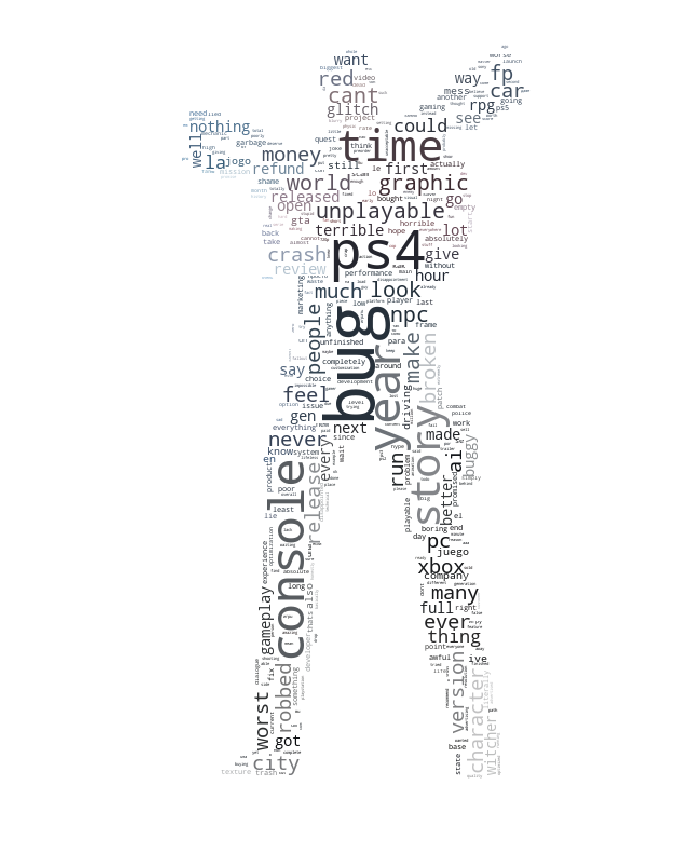

In [70]:
text = str([i for i in review0['Cleaned Review'].apply(lambda sen:' '.join(x for x in sen.split() if x not in delete))])
wc = WordCloud(background_color="white", max_words=700, collocations = False,mask=char_mask,stopwords=stop)
wc = wc.generate(text)
image_colors = ImageColorGenerator(char_mask)

plt.figure(figsize=(25,15))
plt.imshow(wc)
plt.axis('off')
plt.imshow(wc)
plt.axis('off')
# to recolour the image
plt.imshow(wc.recolor(color_func=image_colors))
plt.show()

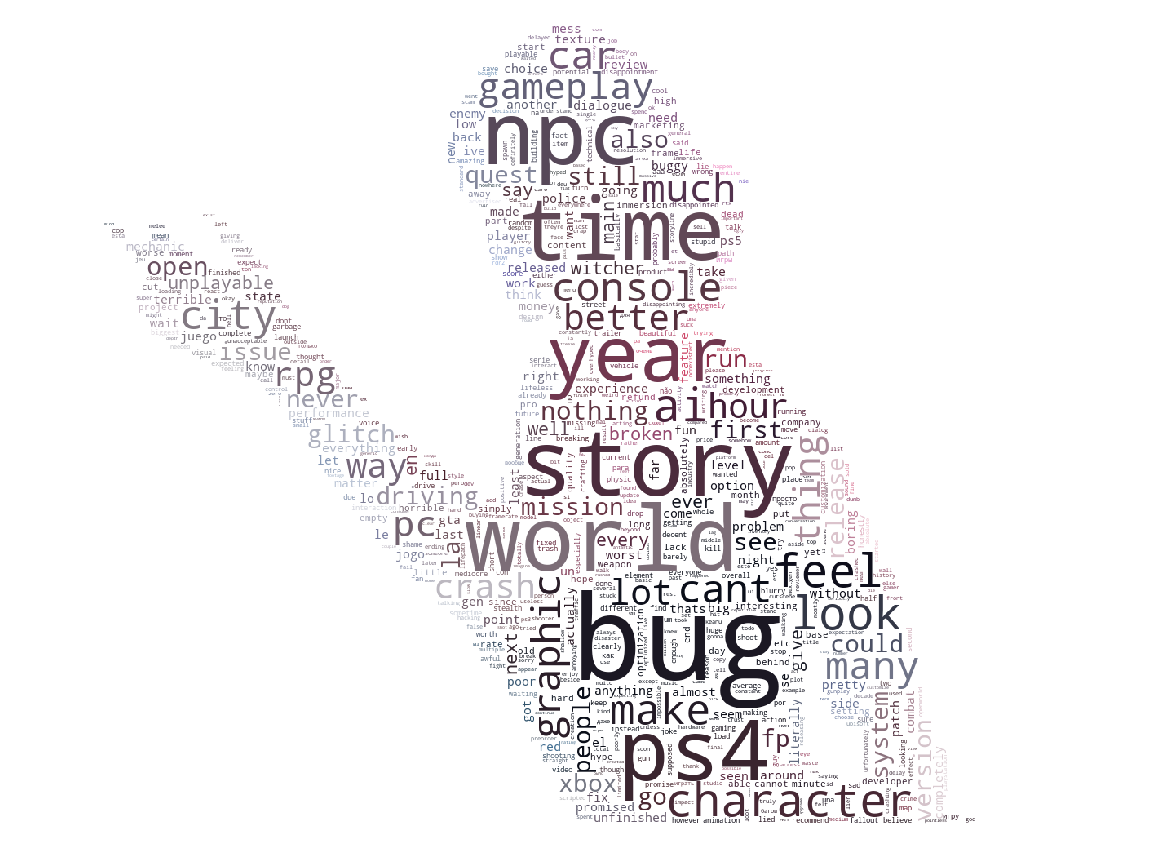

In [71]:
text = str([i for i in review00['Cleaned Review'].apply(lambda sen:' '.join(x for x in sen.split() if x not in delete))])
wc = WordCloud(background_color="white", max_words=700, collocations = False,mask=char_mask1,stopwords=stop)
wc = wc.generate(text)
image_colors1 = ImageColorGenerator(char_mask1)

plt.figure(figsize=(25,15))
plt.imshow(wc)
plt.axis('off')
plt.imshow(wc)
plt.axis('off')
# to recolour the image
plt.imshow(wc.recolor(color_func=image_colors1))
plt.show()

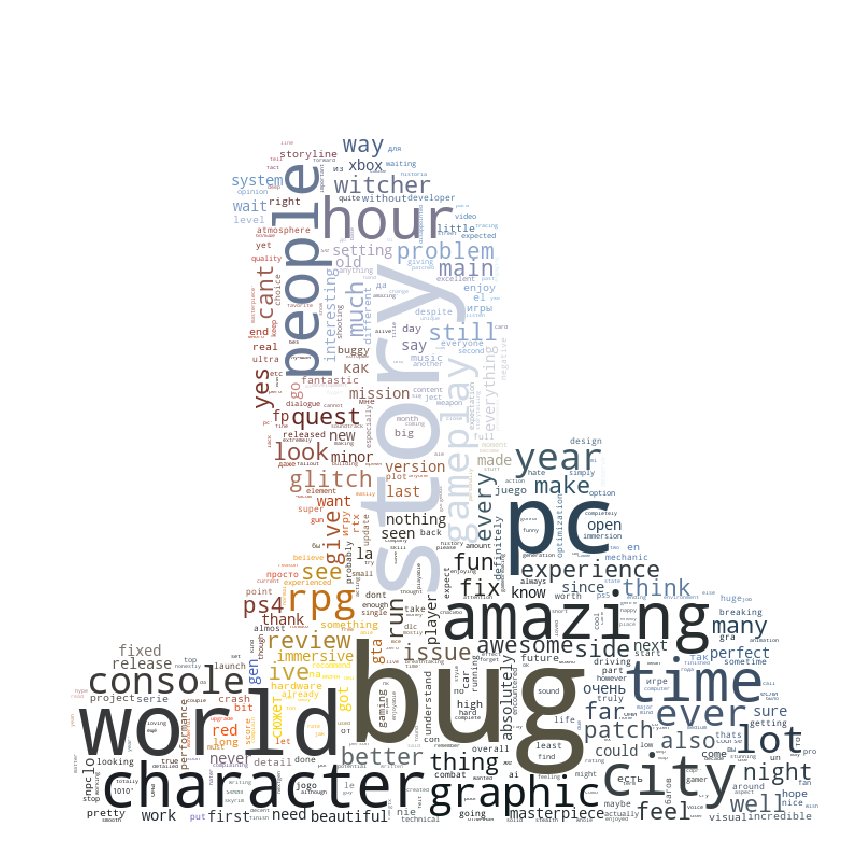

In [72]:
text = str([i for i in review1['Cleaned Review'].apply(lambda sen:' '.join(x for x in sen.split() if x not in delete))])
wc = WordCloud(background_color="white", max_words=700, collocations = False,mask=char_mask3,stopwords=stop)
wc = wc.generate(text)
image_colors2 = ImageColorGenerator(char_mask3)

plt.figure(figsize=(25,15))
plt.imshow(wc)
plt.axis('off')
plt.imshow(wc)
plt.axis('off')
# to recolour the image
plt.imshow(wc.recolor(color_func=image_colors3))
plt.show()

ValueError: ImageColorGenerator is smaller than the canvas

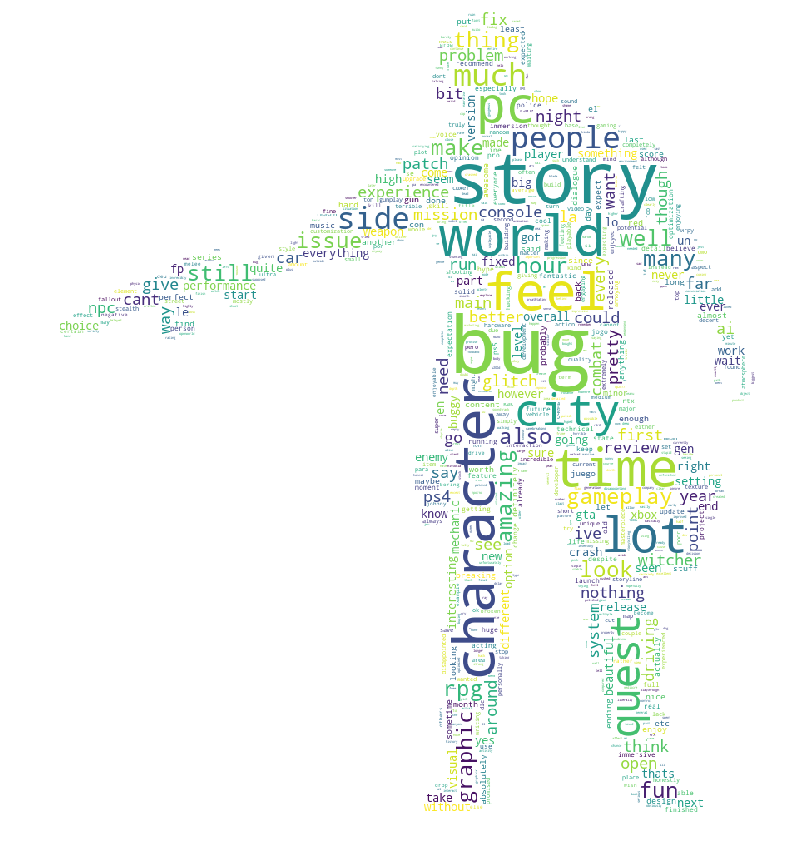

In [73]:
text = str([i for i in review11['Cleaned Review'].apply(lambda sen:' '.join(x for x in sen.split() if x not in delete))])
wc = WordCloud(background_color="white", max_words=700, collocations = False,mask=char_mask2,stopwords=stop)
wc = wc.generate(text)
image_colors = ImageColorGenerator(char_mask2)

plt.figure(figsize=(25,15))
plt.imshow(wc)
plt.axis('off')
plt.imshow(wc)
plt.axis('off')
# to recolour the image
plt.imshow(wc.recolor(color_func=image_colors2))
plt.show()